__Xiangyi Cheng (xxc283)__

# Background and Concepts 
Feature detection in computer vision is a irreplacable portion for computing abstrations of image information and making local decisions whether there is an image feature of the given type. Features included edges, corners, shapes, etc. provides useful and critical information to various researches and uses. Template matching is a small portion of feature detection. Template is treated as a unique kernel and applied to the image to see if the image and kenel match. If these two match or are closed to each other, we can tell that the object is found, otherwise it is not found.

# Implement
Shape detection, especially circle with certain diameter detection, is chosen to be my goal. To begin, import necessary libraries such as OpenCV, numpy and matplotlib into the code.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read the information of the image which is to be detected and the template image in and convert them into gray scaled image.

In [2]:
img_shapes=cv2.imread('eecs531-xxc283/A1/shapes.jpg')
# convert the image into black and white.
img_shapes_gray=cv2.cvtColor(img_shapes,cv2.COLOR_BGR2GRAY)
template=cv2.imread('eecs531-xxc283/A1/template.jpg',0)

Show the template and the to-be-detected image. As shown below, all circles with the same diameter in the second image should be found in the first image.

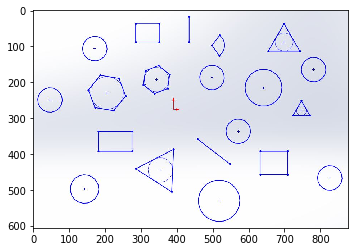

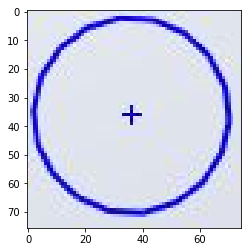

In [3]:
img1=cv2.cvtColor(img_shapes,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()
img2=cv2.imread('eecs531-xxc283/A1/template.jpg')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

The width and height of the template are obtained from template.shape[::-1] in which -1 stands for only first two numbers are extracted. matchTemplate function in OpenCV is used in this detection. Threshold is set to 0.8 initially. 

In [4]:
w,h=template.shape[::-1]
# detect the object from the template. 
result=cv2.matchTemplate(img_shapes_gray,template,cv2.TM_CCOEFF_NORMED)
# set the threshold.
threshold=0.3

Then the coordinates of the targets are determined by np.where once the information is larger than the threshold number. 

In [5]:
location=np.where(result>=threshold)

To show the result, draw a red rectangle in the target location.

In [6]:
for pt in zip(*location[::-1]):
	cv2.rectangle(img_shapes,pt,(pt[0]+w,pt[1]+h),(255,0,255),1)

Show the result by matplotlib.

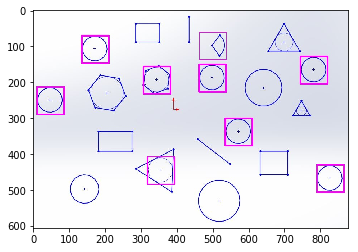

In [7]:
cv2.imwrite('eecs531-xxc283/A1/detection_0.3.jpg',img_shapes)
img3=cv2.imread('eecs531-xxc283/A1/detection_0.3.jpg')
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

From the result, we can see that the accuracy is acceptable. However, there is a false positive result that a sector is treated as circle.
To improve the result, give a bigger threshold to the detection. 

In [8]:
threshold=0.5

Repeat the process again to get the result.

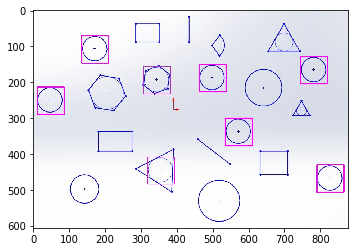

In [9]:
img_shapes1=cv2.imread('eecs531-xxc283/A1/shapes.jpg')
result=cv2.matchTemplate(img_shapes_gray,template,cv2.TM_CCOEFF_NORMED)
location=np.where(result>=threshold)
for pt in zip(*location[::-1]):
	cv2.rectangle(img_shapes1,pt,(pt[0]+w,pt[1]+h),(255,0,255),1)

cv2.imwrite('eecs531-xxc283/A1/detection_0.5.jpg',img_shapes1)
img4=cv2.imread('eecs531-xxc283/A1/detection_0.5.jpg')
img4=cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
plt.imshow(img4)
plt.show()

The circles with the same diameter as the template have all detected when the threshold is equal to 0.5.

Repeat the detection for threshold is 0.8.

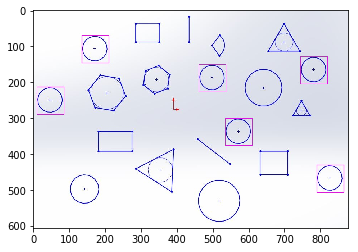

In [10]:
threshold=0.8

img_shapes2=cv2.imread('eecs531-xxc283/A1/shapes.jpg')
result=cv2.matchTemplate(img_shapes_gray,template,cv2.TM_CCOEFF_NORMED)
location=np.where(result>=threshold)
for pt in zip(*location[::-1]):
	cv2.rectangle(img_shapes2,pt,(pt[0]+w,pt[1]+h),(255,0,255),1)

cv2.imwrite('eecs531-xxc283/A1/detection_0.8.jpg',img_shapes2)
img5=cv2.imread('eecs531-xxc283/A1/detection_0.8.jpg')
img5=cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
plt.imshow(img5)
plt.show()

One circle is missed when threshold is 0.8, but all the circles pointed out are correct.  

# Compasion and Analysis
Compared the results obtained from these three thresholds (0.3,0.5,0.8), the conclusion is obvious that false alarm is lower with larger threshold, however, some real objects would be missed. Therefore, an appropriate threshold is vital to the feature detection.